In [2]:
#pip install gym


In [3]:
#pip install torch torchvision

In [4]:
import numpy as np
import random

In [5]:
class Simple1DEnvironment:  
    def __init__(self, size=10, goal_position=9):  
        self.size = size  
        self.goal_position = goal_position  
        self.state = 0  

    def reset(self):  
        self.state = 0  
        return self.state  

    def step(self, action):  
        if action == 0:  # move left  
            self.state = max(0, self.state - 1)  
        elif action == 1:  # move right  
            self.state = min(self.size - 1, self.state + 1)  

        reward = 1 if self.state == self.goal_position else -0.1  
        done = self.state == self.goal_position  
        return self.state, reward, done  



In [6]:
class QLearningAgent:  
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):  
        self.state_size = state_size  
        self.action_size = action_size  
        self.q_table = np.zeros((state_size, action_size))  
        self.learning_rate = learning_rate  
        self.discount_factor = discount_factor  
        self.exploration_rate = exploration_rate  
        self.exploration_decay = exploration_decay  
        self.exploration_min = 0.01  

    def choose_action(self, state):  
        if np.random.rand() < self.exploration_rate:  
            return random.choice(range(self.action_size))  
        return np.argmax(self.q_table[state])  

    def learn(self, state, action, reward, next_state, done):  
        best_next_action = np.argmax(self.q_table[next_state])  
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action] * (not done)  
        td_error = td_target - self.q_table[state][action]  
        self.q_table[state][action] += self.learning_rate * td_error  
        if done:  
            self.exploration_rate = max(self.exploration_min, self.exploration_rate * self.exploration_decay)  


In [7]:
# Training the agent  
env = Simple1DEnvironment()  
agent = QLearningAgent(state_size=env.size, action_size=2)  

episodes = 1000  
for e in range(episodes):  
    state = env.reset()  
    done = False  
    while not done:  
        action = agent.choose_action(state)  
        next_state, reward, done = env.step(action)  
        agent.learn(state, action, reward, next_state, done)  
        state = next_state  
    if e % 100 == 0:  
        print(f"Episode {e}, Exploration Rate: {agent.exploration_rate:.2f}")  


Episode 0, Exploration Rate: 0.99
Episode 100, Exploration Rate: 0.60
Episode 200, Exploration Rate: 0.37
Episode 300, Exploration Rate: 0.22
Episode 400, Exploration Rate: 0.13
Episode 500, Exploration Rate: 0.08
Episode 600, Exploration Rate: 0.05
Episode 700, Exploration Rate: 0.03
Episode 800, Exploration Rate: 0.02
Episode 900, Exploration Rate: 0.01


In [8]:
# Test the trained agent  
state = env.reset()  
done = False  
while not done:  
    action = agent.choose_action(state)  
    state, reward, done = env.step(action)  
    print(f"State: {state}, Action: {action}, Reward: {reward}")  

print("Goal reached!")


State: 0, Action: 0, Reward: -0.1
State: 1, Action: 1, Reward: -0.1
State: 2, Action: 1, Reward: -0.1
State: 3, Action: 1, Reward: -0.1
State: 4, Action: 1, Reward: -0.1
State: 5, Action: 1, Reward: -0.1
State: 6, Action: 1, Reward: -0.1
State: 7, Action: 1, Reward: -0.1
State: 8, Action: 1, Reward: -0.1
State: 9, Action: 1, Reward: 1
Goal reached!


Hyper parameter Tuning to imporve the model

``1. Exploration-Exploitation Balance:
Exploration Rate (exploration_rate): The agent starts by exploring, but over time it needs to exploit learned knowledge.
What you can change: Start with a higher exploration rate or experiment with different decay strategies. A slower decay (increase exploration_decay slightly) can help the agent explore longer, especially in complex environments.

2. Learning Rate (learning_rate):
Impact: The learning rate controls how much new information overrides old information.
What you can change: A lower learning rate can help the agent avoid overreacting to new information, but a higher learning rate allows faster learning. Adjust based on how fast or slow the agent is learning.

3. Discount Factor (discount_factor):
Impact: This controls how much the agent values future rewards over immediate rewards. A higher discount factor prioritizes long-term gains.
What you can change: Try lowering the discount factor if the environment is more short-term reward oriented, or increase it if the agent needs to focus on long-term goals.``

Hyper Parametert Tuned Code

In [9]:
#increasing the learning rate from 0.1 to 0.2 to fasten the learninf process
#increase the Discout factor to focus on long term goals (0.95 to 0.98)
#increasing exploration_decay slightly to help the agent to explore longer
class QLearningAgent:  
    def __init__(self, state_size, action_size, learning_rate=0.2, discount_factor=0.98, exploration_rate=1.0, exploration_decay=0.997):  
        self.state_size = state_size  
        self.action_size = action_size  
        self.q_table = np.zeros((state_size, action_size))  
        self.learning_rate = learning_rate  
        self.discount_factor = discount_factor  
        self.exploration_rate = exploration_rate  
        self.exploration_decay = exploration_decay  
        self.exploration_min = 0.01  

    def choose_action(self, state):  
        if np.random.rand() < self.exploration_rate:  
            return random.choice(range(self.action_size))  
        return np.argmax(self.q_table[state])  

    def learn(self, state, action, reward, next_state, done):  
        best_next_action = np.argmax(self.q_table[next_state])  
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action] * (not done)  
        td_error = td_target - self.q_table[state][action]  
        self.q_table[state][action] += self.learning_rate * td_error  
        if done:  
            self.exploration_rate = max(self.exploration_min, self.exploration_rate * self.exploration_decay)  


Episodes Length and Number:
Impact: The agent might need more episodes or longer training durations to learn effectively in more complex environments.
What you can change: Increase the number of episodes or adjust how early an episode terminates (currently done when the agent reaches the goal).

In [10]:
#Increasing the episode numbers into 2000
# Training the agent  
env = Simple1DEnvironment()  
agent = QLearningAgent(state_size=env.size, action_size=2)  

episodes = 2000  
for e in range(episodes):  
    state = env.reset()  
    done = False  
    while not done:  
        action = agent.choose_action(state)  
        next_state, reward, done = env.step(action)  
        agent.learn(state, action, reward, next_state, done)  
        state = next_state  
    if e % 100 == 0:  
        print(f"Episode {e}, Exploration Rate: {agent.exploration_rate:.2f}")  


Episode 0, Exploration Rate: 1.00
Episode 100, Exploration Rate: 0.74
Episode 200, Exploration Rate: 0.55
Episode 300, Exploration Rate: 0.40
Episode 400, Exploration Rate: 0.30
Episode 500, Exploration Rate: 0.22
Episode 600, Exploration Rate: 0.16
Episode 700, Exploration Rate: 0.12
Episode 800, Exploration Rate: 0.09
Episode 900, Exploration Rate: 0.07
Episode 1000, Exploration Rate: 0.05
Episode 1100, Exploration Rate: 0.04
Episode 1200, Exploration Rate: 0.03
Episode 1300, Exploration Rate: 0.02
Episode 1400, Exploration Rate: 0.01
Episode 1500, Exploration Rate: 0.01
Episode 1600, Exploration Rate: 0.01
Episode 1700, Exploration Rate: 0.01
Episode 1800, Exploration Rate: 0.01
Episode 1900, Exploration Rate: 0.01


``Testing the model with new parameters``

In [11]:
# Test the trained agent  
state = env.reset()  
done = False  
while not done:  
    action = agent.choose_action(state)  
    state, reward, done = env.step(action)  
    print(f"State: {state}, Action: {action}, Reward: {reward}")  

print("Goal reached!")


State: 1, Action: 1, Reward: -0.1
State: 2, Action: 1, Reward: -0.1
State: 3, Action: 1, Reward: -0.1
State: 4, Action: 1, Reward: -0.1
State: 5, Action: 1, Reward: -0.1
State: 6, Action: 1, Reward: -0.1
State: 7, Action: 1, Reward: -0.1
State: 8, Action: 1, Reward: -0.1
State: 9, Action: 1, Reward: 1
Goal reached!


``Now try to change the stratergy in choosing the Action``

Action Selection Strategy:
Impact: Currently, you use an epsilon-greedy approach for action selection.
What you can change: Instead of just using random action selection during exploration, you could experiment with softmax exploration (Boltzmann distribution) or Upper Confidence Bound (UCB) for better action selection.

In [31]:
class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):
        self.state_size = state_size
        self.action_size = action_size
        self.q_table = np.zeros((state_size, action_size))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.exploration_min = 0.01

    def choose_action(self, state, strategy="epsilon_greedy", temperature=1.0):
        if strategy == "epsilon_greedy":
            # Epsilon-greedy action selection
            if np.random.rand() < self.exploration_rate:
                return random.choice(range(self.action_size))
            return np.argmax(self.q_table[state])
        elif strategy == "softmax":
            # Softmax action selection
            q_values = self.q_table[state]
            exp_q_values = np.exp(q_values / temperature)
            probabilities = exp_q_values / np.sum(exp_q_values)
            return np.random.choice(range(self.action_size), p=probabilities)
    def learn(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action] * (not done)
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error
        if done:
            self.exploration_rate = max(self.exploration_min, self.exploration_rate * self.exploration_decay)


In [33]:
# Training the agent and tracking progress
env = Simple1DEnvironment()
agent = QLearningAgent(state_size=env.size, action_size=2)

episodes = 2000
rewards_per_episode = []
steps_per_episode = []

for e in range(episodes):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False
    while not done:
        action = agent.choose_action(state, strategy="softmax", temperature=1.0)  # Using softmax
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        steps += 1

    rewards_per_episode.append(total_reward)
    steps_per_episode.append(steps)
    if e % 100 == 0:
        print(f"Episode {e}, Exploration Rate: {agent.exploration_rate:.2f}")

Episode 0, Exploration Rate: 0.99
Episode 100, Exploration Rate: 0.60
Episode 200, Exploration Rate: 0.37
Episode 300, Exploration Rate: 0.22
Episode 400, Exploration Rate: 0.13
Episode 500, Exploration Rate: 0.08
Episode 600, Exploration Rate: 0.05
Episode 700, Exploration Rate: 0.03
Episode 800, Exploration Rate: 0.02
Episode 900, Exploration Rate: 0.01
Episode 1000, Exploration Rate: 0.01
Episode 1100, Exploration Rate: 0.01
Episode 1200, Exploration Rate: 0.01
Episode 1300, Exploration Rate: 0.01
Episode 1400, Exploration Rate: 0.01
Episode 1500, Exploration Rate: 0.01
Episode 1600, Exploration Rate: 0.01
Episode 1700, Exploration Rate: 0.01
Episode 1800, Exploration Rate: 0.01
Episode 1900, Exploration Rate: 0.01


``Testing the model after changing the stratergy to choose action``

In [34]:
# Test the trained agent  
state = env.reset()  
done = False  
while not done:  
    action = agent.choose_action(state)  
    state, reward, done = env.step(action)  
    print(f"State: {state}, Action: {action}, Reward: {reward}")  

print("Goal reached!")


State: 1, Action: 1, Reward: -0.1
State: 2, Action: 1, Reward: -0.1
State: 3, Action: 1, Reward: -0.1
State: 4, Action: 1, Reward: -0.1
State: 5, Action: 1, Reward: -0.1
State: 6, Action: 1, Reward: -0.1
State: 7, Action: 1, Reward: -0.1
State: 8, Action: 1, Reward: -0.1
State: 9, Action: 1, Reward: 1
Goal reached!


```Plotting the results```

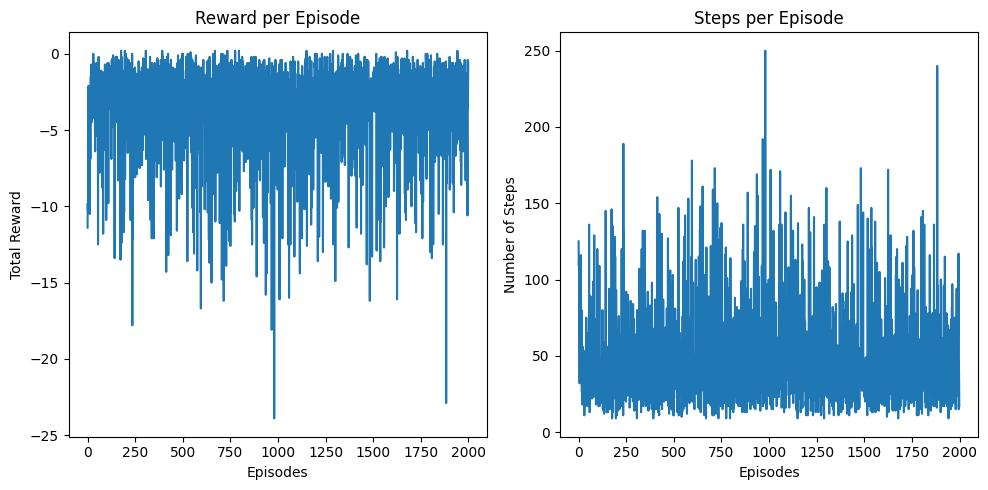

In [35]:
import matplotlib.pyplot as plt
# Plot average reward per episode
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode)
plt.title("Reward per Episode")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")

# Plot number of steps per episode
plt.subplot(1, 2, 2)
plt.plot(steps_per_episode)
plt.title("Steps per Episode")
plt.xlabel("Episodes")
plt.ylabel("Number of Steps")

plt.tight_layout()
plt.show()